In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('SuperMarket Analysis.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [2]:
df['Date']=pd.to_datetime(df['Date'])

In [10]:
print("\nBranch Statistics (Gross Income):")
print(df.groupby('Branch')['gross income'].agg(['mean', 'median', 'max', 'min']))

print("\nCustomer Type Statistics (Gross Income):")
print(df.groupby('Customer type')['gross income'].agg(['mean', 'median', 'max', 'min']))

print("\nGender Statistics (Gross Income):")
print(df.groupby('Gender')['gross income'].agg(['mean', 'median', 'max', 'min']))

print("\nPayment Method Statistics (Gross Income):")
print(df.groupby('Payment')['gross income'].agg(['mean', 'median', 'max', 'min']))


Branch Statistics (Gross Income):
             mean    median    max     min
Branch                                    
Alex    14.874001  11.46800  49.49  0.6045
Cairo   15.232024  12.04200  48.69  0.8875
Giza    16.052367  12.92475  49.65  0.5085

Customer Type Statistics (Gross Income):
                    mean  median    max     min
Customer type                                  
Member         15.987759  12.950  49.65  0.5085
Normal         14.589161  10.752  49.49  0.6045

Gender Statistics (Gross Income):
             mean  median    max     min
Gender                                  
Female  16.234829  13.533  49.65  0.6045
Male    14.240749  10.226  49.49  0.5085

Payment Method Statistics (Gross Income):
                  mean  median    max     min
Payment                                      
Cash         15.532471  12.522  47.79  0.5085
Credit card  15.429042  11.409  49.65  0.6045
Ewallet      15.181933  12.080  49.26  0.6390


In [3]:
import seaborn as sns
sns.set(style="whitegrid")

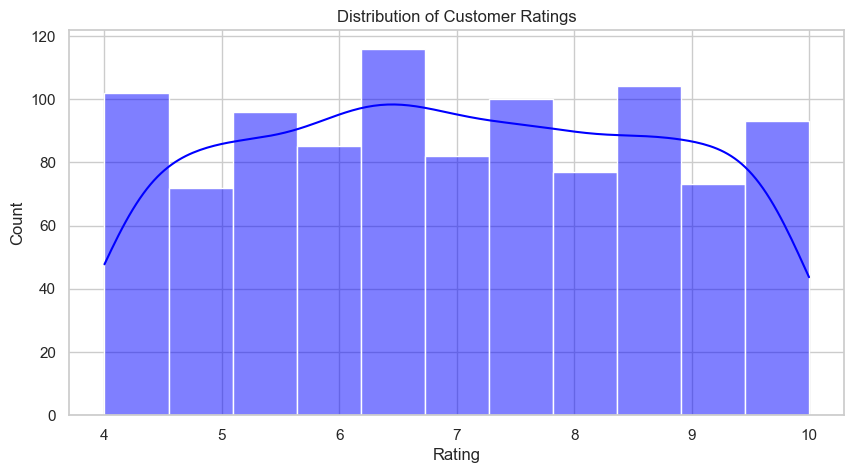

In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Rating'], kde=True, color='blue')
plt.title('Distribution of Customer Ratings')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_21268\38252152.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer type', data=df, palette='pastel')


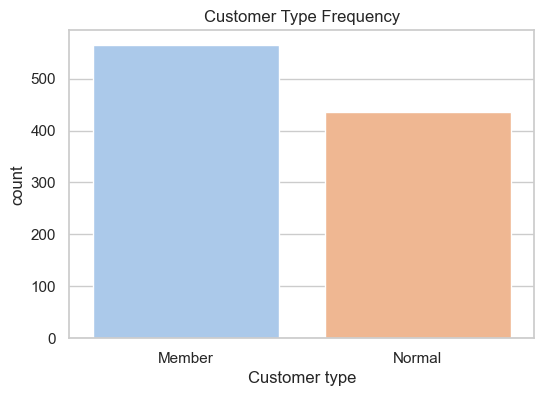

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Customer type', data=df, palette='pastel')
plt.title('Customer Type Frequency')
plt.show()

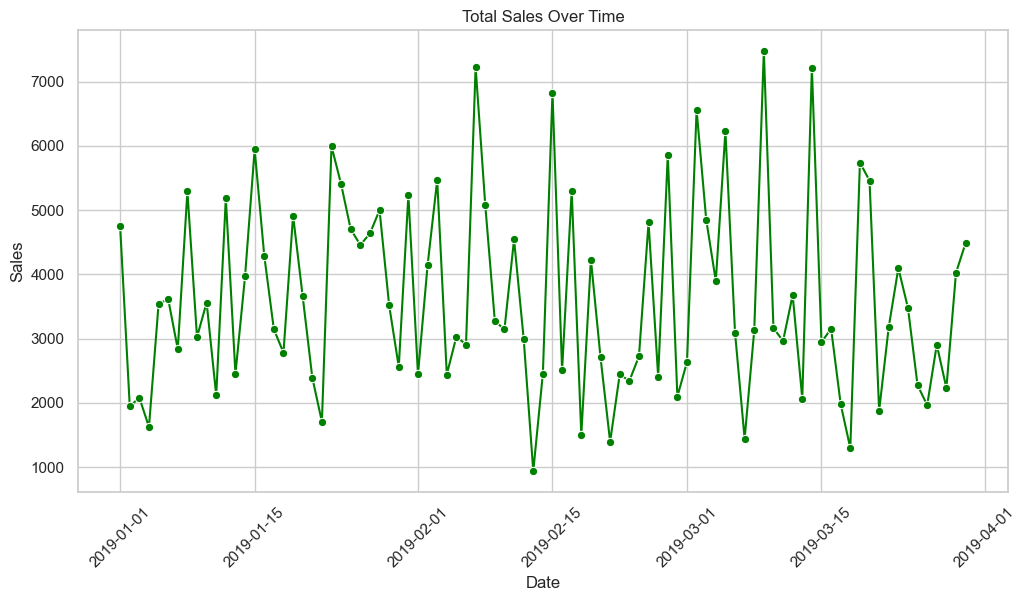

In [6]:
daily_sales = df.groupby('Date')['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=daily_sales, marker='o', color='green')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)
plt.show()

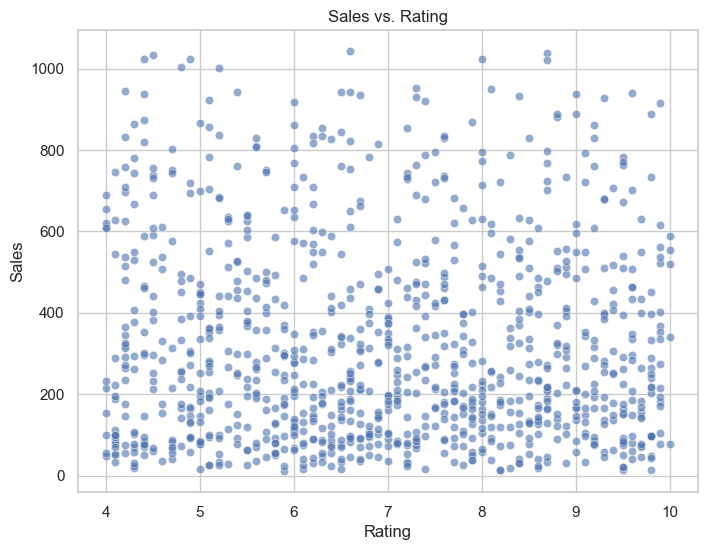

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Sales', data=df, alpha=0.6)
plt.title('Sales vs. Rating')
plt.show()

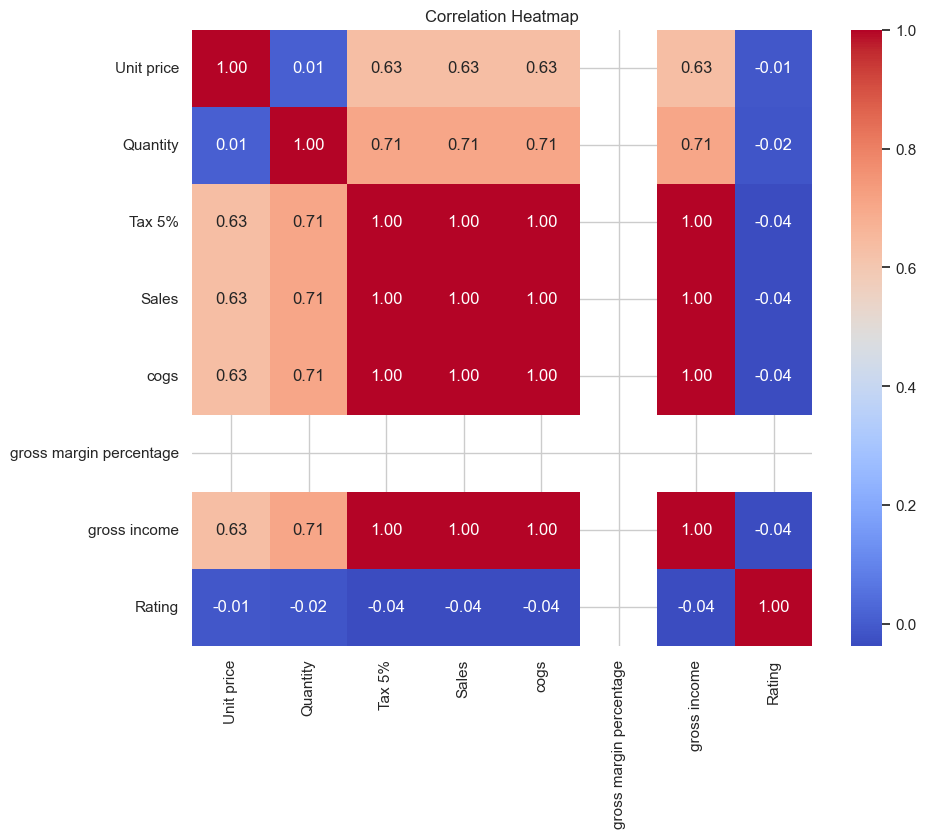

In [8]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

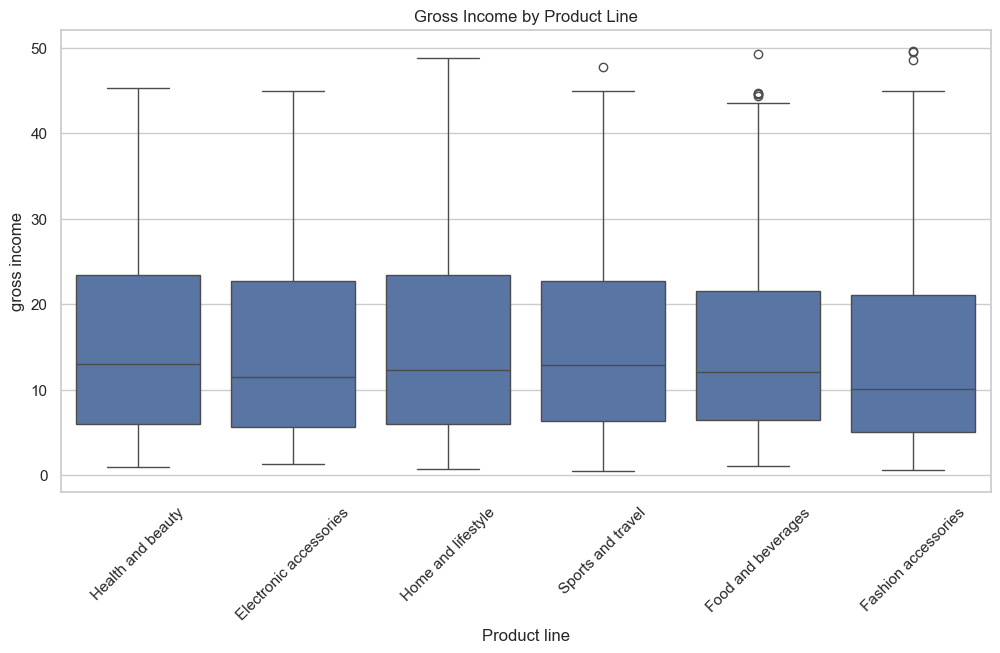

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product line', y='gross income', data=df)
plt.title('Gross Income by Product Line')
plt.xticks(rotation=45)
plt.show()

Total Revenue: 322,966.75
Average Transaction Value: 322.97
Total Gross Income: 15,379.37

Product Line Statistics
                             Sales  Quantity  gross income    Rating
Product line                                                        
Food and beverages      56144.8440       952     2673.5640  7.113218
Sports and travel       55122.8265       920     2624.8965  6.916265
Electronic accessories  54337.5315       971     2587.5015  6.924706
Fashion accessories     54305.8950       902     2585.9950  7.029213
Home and lifestyle      53861.9130       911     2564.8530  6.837500
Health and beauty       49193.7390       854     2342.5590  7.003289

Correlations
                 Sales  Quantity  Unit price  gross income    Rating
Sales         1.000000  0.705510    0.633962      1.000000 -0.036442
Quantity      0.705510  1.000000    0.010778      0.705510 -0.015815
Unit price    0.633962  0.010778    1.000000      0.633962 -0.008778
gross income  1.000000  0.705510    0.63396

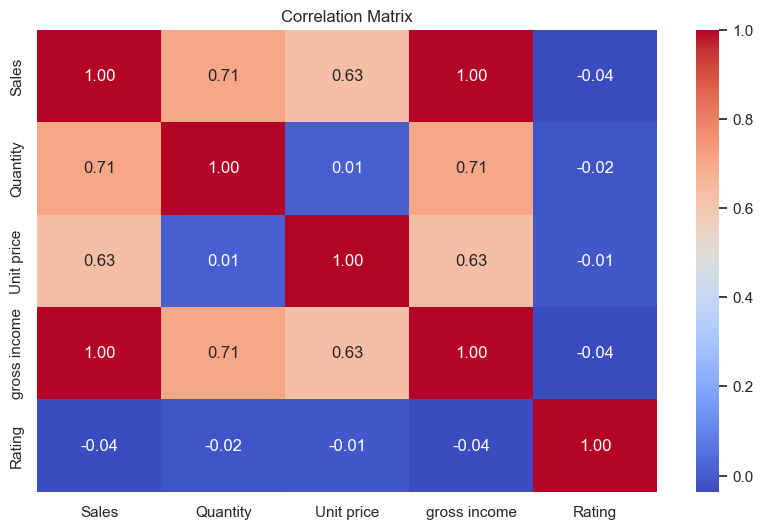

In [11]:
total_revenue = df['Sales'].sum()
average_revenue = df['Sales'].mean()
total_gross_income = df['gross income'].sum()

print(f"Total Revenue: {total_revenue:,.2f}")
print(f"Average Transaction Value: {average_revenue:,.2f}")
print(f"Total Gross Income: {total_gross_income:,.2f}")

print("\nProduct Line Statistics")
product_stats = df.groupby('Product line').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'gross income': 'sum',
    'Rating': 'mean'
}).sort_values(by='Sales', ascending=False)

print(product_stats)

print("\nCorrelations")
numerical_cols = df[['Sales', 'Quantity', 'Unit price', 'gross income', 'Rating']]
correlation_matrix = numerical_cols.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()